# Regression Tutorial
<hr>


## what is Regression ?
<hr>
* it's just like ...
![](https://i.imgur.com/4eROr3A.png)
<hr>
Regression is a statistical measure used in finance, investing and other disciplines that attempts to determine the strength of the relationship between one dependent variable (usually denoted by Y) and a series of other changing variables (known as independent variables).<br><br> Regression helps investment and financial managers to value assets and understand the relationships between variables, such as commodity prices and the stocks of businesses dealing in those commodities.


## Achievement
<hr>
If we have an input vector X<sup>T</sup> = ( X<sub>1</sub>,X<sub>2</sub>...,X<sub>p</sub> )<br>
And we want to predict a real-valued output Y.<br>
The linear regression model has the form - 
![](https://i.imgur.com/6bJx5tn.png)
<br>
Here the β<sub>j</sub> ’s are unknown parameters or coefficients, and the variables X<sub>j</sub> can come
from our input.<br><br>
We supposed to do regression so that we can get suitable parameters of β<sub>j</sub> and β<sub>0</sub>, and then the linear equation is our target function .

## About linear and non-linear
<hr>
* **Linear regression:**<br><br>
A model is linear when each term is either a constant or the product of a parameter and a predictor variable.<br> A linear equation is constructed by adding the results for each term.<br>
This constrains the equation to just one basic form like above one.
<br>
![](https://i.imgur.com/g9vrD79.png)
<br>
![](https://i.imgur.com/7wRKbTB.png)
<br><br><br><br>
* **Non-linear regression:**<br><br>
While a linear equation has one basic form, nonlinear equations can take many different forms.<br>The easiest way to determine whether an equation is nonlinear is to focus on the term “nonlinear” itself.<br> Literally, it’s not linear. If the equation doesn’t meet the criteria above for a linear equation, it’s nonlinear.<br>
such as Sin(x), exponetial function , and weibull growth ...
<br>

<br>
![](https://i.imgur.com/VbaosV9.png)

## Linear regression
<hr>

## Import packages
<hr>
Import packages to make most of the third-party functions work.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Dataset
<hr>
We generate the dataset at will.<br>
Also we supposed to sample the data from normal distrbution, and define the reange from -127 to 100.


In [2]:
sample_num = 50
split_rate = 0.2 # HOW TO DIVIDE TRAINING DATA AND TESTING DATA
c = np.round(np.random.uniform(-273,100,sample_num))
#c.sort()
f = np.round((9/5)*c + 32)
f,c

(array([-270.,  169., -308., -135.,   64., -292., -234., -440., -152.,
        -335.,  -56.,   19., -234., -326.,  -71.,  -98.,   99., -188.,
         120., -423., -144., -121., -191.,   93., -234.,   16.,  -35.,
        -398., -432., -436., -384.,  194.,  210.,   -4., -198.,   54.,
          93.,  -44.,   30., -260., -240.,   82.,  127.,   -6., -233.,
        -290.,  -44., -198., -231., -308.]),
 array([-168.,   76., -189.,  -93.,   18., -180., -148., -262., -102.,
        -204.,  -49.,   -7., -148., -199.,  -57.,  -72.,   37., -122.,
          49., -253.,  -98.,  -85., -124.,   34., -148.,   -9.,  -37.,
        -239., -258., -260., -231.,   90.,   99.,  -20., -128.,   12.,
          34.,  -42.,   -1., -162., -151.,   28.,   53.,  -21., -147.,
        -179.,  -42., -128., -146., -189.]))

In [3]:
# original data combine with bias,
# just like y = Ax + b
c = c.reshape(-1,1)
c_b = np.concatenate((c, np.ones(len(c)).reshape(-1,1)), axis=1)

# training data
train_X = c_b[:-round(sample_num*split_rate)]
train_y = f[:-round(sample_num*split_rate)]

# testing data
test_X = c_b[-round(sample_num*split_rate):]
test_y = f[-round(sample_num*split_rate):]

## Least Square Equation
<hr>
Mathematically, linear least squares is the problem of approximately solving an overdetermined system of linear equations, where the best approximation is defined as that which minimizes the sum of squared differences between the data values and their corresponding modeled values. The approach is called linear least squares since the assumed function is linear in the parameters to be estimated. 

from wiki  https://en.wikipedia.org/wiki/Linear_least_squares_(mathematics)
<br><br><br>
In order to implement this approach, let’s take a look at a concrete example: ```Ordinary Least Squares (OLS) Linear Regression```.<br> The illustration below shall serve as a quick reminder to recall the different components of a simple linear regression model:
![](https://i.imgur.com/31pl1MY.png)
In Ordinary Least Squares (OLS) Linear Regression, our goal is to find the line (or hyperplane) that minimizes the vertical offsets.<br>
Or, in other words, we define the best-fitting line as the line that minimizes the sum of squared errors (SSE) or mean squared error (MSE) between our target variable (y) and our predicted output over all samples i in our dataset of size n.
![](https://i.imgur.com/RY1t4Rl.png)
***
### Now, we can implement a linear regression model for performing ordinary least squares regression using one of the following approaches:
<br><br>
    **1. Normal Equations (closed-form solution)**
<hr>
The closed-form solution may (should) be preferred for “smaller” datasets if computing (a “costly”) matrix inverse is not a concern. <br>For very large datasets, or datasets where the inverse of X<sup>T</sup>X may not exist (the matrix is non-invertible or singular, e.g., in case of perfect multicollinearity), the GD or SGD approaches are to be preferred. The linear function (linear regression model) is defined as:
![](https://i.imgur.com/ynTiolJ.png)
where y is the response variable, x is an m-dimensional sample vector, and w is the weight vector (vector of coefficients). Note that w<sub>0</sub> represents the y-axis intercept of the model and therefore x<sub>0</sub>=1. Using the closed-form solution (normal equation), we compute the weights of the model as follows:
![](https://i.imgur.com/yJnFXtW.png)

<br><br>
    **2. Gradient Descent (GD)**
<hr>
Using the Gradient Decent (GD) optimization algorithm, the weights are updated incrementally after each epoch (= pass over the training dataset).
<br>
The cost function J(⋅), the sum of squared errors (SSE), can be written as:
![](https://i.imgur.com/KbCYh8L.png)
<br>
The magnitude and direction of the weight update is computed by taking a step in the opposite direction of the cost gradient
<br>
![](https://i.imgur.com/HRjve6y.png)
<br>
where η is the learning rate. The weights are then updated after each epoch via the following update rule:
![](https://i.imgur.com/XIq6Vgf.png)
<br>
where Δw is a vector that contains the weight updates of each weight coefficient w, which are computed as follows:
![](https://i.imgur.com/QxdFNOc.png)
<br>
Essentially, we can picture GD optimization as a hiker (the weight coefficient) who wants to climb down a mountain (cost function) into a valley (cost minimum), and each step is determined by the steepness of the slope (gradient) and the leg length of the hiker (learning rate). Considering a cost function with only a single weight coefficient, we can illustrate this concept as follows:
![](https://i.imgur.com/PXRlbI4.png)
<br><br><br>
reference by. https://sebastianraschka.com/faq/docs/closed-form-vs-gd.html?utm_source=top.caibaojian.com/52598

 ## Normal Equation (closed-form solution)
 <hr>
 Write down your equation over there !

In [4]:
def OLSR(X, y):
    '''
        :param X: materials 
        :param y: target      
        :return: (X.T*X)^-1*X.T*y
    '''
    return np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

 ## Gradient descent
 <hr>

In [5]:
from matplotlib import pyplot as plt

def gd(X,y,theta,alpha,m,iters_num):       
    '''
        :param X: materials 
        :param y: target     
        :param theta: weight which being update     
        :param alpha: learning rate
        :param m: the number of examples
        :param iters_num: the number of iterations
        :return: actual weight
    '''
    xTrans = X.transpose()
    loss_fs = []
    for i in range(0, iters_num):
        hypothesis = np.dot(X, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        loss_fs.append(cost)
        print("Iteration %d | Cost: %f" % (i, cost))
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    plt.plot(range(len(loss_fs)), loss_fs)
    plt.show()
    plt.close()
    return theta

## Residual sum of squares  (RSS)
<hr>
In statistics, the residual sum of squares (RSS), also known as the sum of squared residuals (SSR) or the sum of squared errors of prediction (SSE), is the sum of the squares of residuals (deviations predicted from actual empirical values of data).<br> It is a measure of the discrepancy between the data and an estimation model.<br> A small RSS indicates a tight fit of the model to the data. It is used as an optimality criterion in parameter selection and model selection.

from wiki https://en.wikipedia.org/wiki/Residual_sum_of_squares
<br><br>
![](https://i.imgur.com/Pk4hmWp.png)
<br><br>
## mean square error (MSE)
<hr>
In statistics, the mean squared error (MSE) of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors—that is, the average squared difference between the estimated values and what is estimated.<br> MSE is a risk function, corresponding to the expected value of the squared error loss.<br> The fact that MSE is almost always strictly positive is because of randomness or because the estimator does not account for information that could produce a more accurate estimate.
<br>
The MSE is a measure of the quality of an estimator—it is always non-negative, and values closer to zero are better.
<br><br>
<img src="https://i.imgur.com/qYaL1sl.png" alt="drawing" style="width:200px;"/>

<br><br>
## What does model perform better ? 
<hr>
For RSS,it is a measure of the quality of an estimator—it is always non-negative, and values closer to zero are better. 

<br>
If we get the less value of RSS , it'll represent that we fit this function good!
<br>
Our target is to minimize the error of real data and expected result,and it means we supposed to minimize the value of RSS.


In [6]:
def sum_of_square_error(fx, y):
    E = y - fx
    # write down the answer of Sum square error !
    # E.T*E
    return np.dot(E.T,E)

In [7]:
''' By normal Equation'''

# get weight
weight = OLSR(train_X,train_y) 
# weight * X
pred_y = np.sum(weight*test_X, axis=1) 
# get current error
RSS = sum_of_square_error(pred_y, test_y)


### We take RSS as loss function in Normal Equation

In [8]:
RSS

0.8819971808025843

### It's our result of regression !

In [9]:
# the predict weight as opposed to initial weight: (9/5)*x + 32
weight

array([ 1.79925186, 31.95180698])

<hr>
<br>
### We take MSE as loss function in Gradient Descent

Iteration 0 | Cost: 4405.125000
Iteration 1 | Cost: 153138388.556400
Iteration 2 | Cost: 5675979886102.138672
Iteration 3 | Cost: 210377063791079008.000000
Iteration 4 | Cost: 7797509832585626255360.000000
Iteration 5 | Cost: 289010401103657873247830016.000000
Iteration 6 | Cost: 10712011108602863648021699100672.000000
Iteration 7 | Cost: 397034783359493373366694869578285056.000000
Iteration 8 | Cost: 14715875254341466267821372607445562556416.000000
Iteration 9 | Cost: 545435799526055942283711895282944190802034688.000000
Iteration 10 | Cost: 20216277065603650381212914922027868758614321659904.000000
Iteration 11 | Cost: 749305158825990127677651743899473062627445727729549312.000000
Iteration 12 | Cost: 27772582420653402331593149011548283072722811812482975268864.000000
Iteration 13 | Cost: 1029375449009964542265982503791874237837647529272996946534989824.000000
Iteration 14 | Cost: 38153233249079206081051011437126587757273981833333868059942950273024.000000
Iteration 15 | Cost: 141412854635

/home/silence/.local/lib/python3.5/site-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in square
/home/silence/.local/lib/python3.5/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in subtract


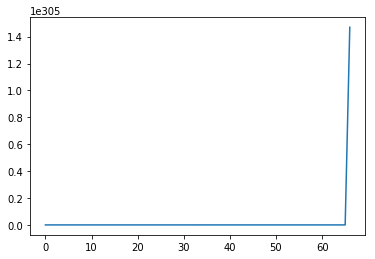

In [10]:
''' By gradient descent'''

m, n = np.shape(train_X)
iters= 1000
alpha = 0.01
theta = np.ones(n)
weight = gd(train_X,train_y,theta, alpha,m,iters) 

<br>
### Oops ! 
### this is infinity !
### The situation or problem also called  Exploding Gradients .
<br>
### Soooo ...
### To conquer this situation, we need a mechanism which named ```normalization``` !
<hr>
<br>
<br>
## Normalization
<hr>
It's simply a case of getting all your data on the same scale: if the scales for different features are wildly different, this can have a knock-on effect on your ability to learn (depending on what methods you're using to do it).<br>
For example, we take L2 normalization in the sklearn packages as our method, and it works!

Iteration 0 | Cost: 26407.223102
Iteration 1 | Cost: 26062.620695
Iteration 2 | Cost: 25724.781450
Iteration 3 | Cost: 25393.572574
Iteration 4 | Cost: 25068.863883
Iteration 5 | Cost: 24750.527750
Iteration 6 | Cost: 24438.439052
Iteration 7 | Cost: 24132.475125
Iteration 8 | Cost: 23832.515711
Iteration 9 | Cost: 23538.442915
Iteration 10 | Cost: 23250.141157
Iteration 11 | Cost: 22967.497124
Iteration 12 | Cost: 22690.399731
Iteration 13 | Cost: 22418.740072
Iteration 14 | Cost: 22152.411380
Iteration 15 | Cost: 21891.308984
Iteration 16 | Cost: 21635.330269
Iteration 17 | Cost: 21384.374634
Iteration 18 | Cost: 21138.343453
Iteration 19 | Cost: 20897.140038
Iteration 20 | Cost: 20660.669597
Iteration 21 | Cost: 20428.839203
Iteration 22 | Cost: 20201.557749
Iteration 23 | Cost: 19978.735919
Iteration 24 | Cost: 19760.286153
Iteration 25 | Cost: 19546.122606
Iteration 26 | Cost: 19336.161121
Iteration 27 | Cost: 19130.319193
Iteration 28 | Cost: 18928.515937
Iteration 29 | Cost: 187

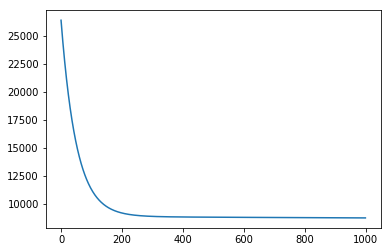

In [11]:
from sklearn import preprocessing 

theta = np.ones(n)
X_normalized = preprocessing.normalize(train_X, norm='l2')
# y_normalized = preprocessing.normalize(train_y.reshape(-1,1), norm='l2')
weight = gd(X_normalized,train_y,theta, alpha,m,iters) 

### The result upside is what we want to see !
### the loss curve is getting smooth and minimizing itself.

In [12]:
weight

array([190.25767077,  33.97427766])

In [13]:
# the prediction curve
X = np.arange(-273, 100,1)
x = np.concatenate((X.reshape(-1,1), np.ones(len(X)).reshape(-1,1)), axis=1)
fx = np.dot(x, weight)

In [14]:
# the actural curve
real_X = np.arange(-273, 100,1)
real_fx = np.round((9/5)*X + 32)

## Visualization
<br>
We can identify the result of our prediction !<br>

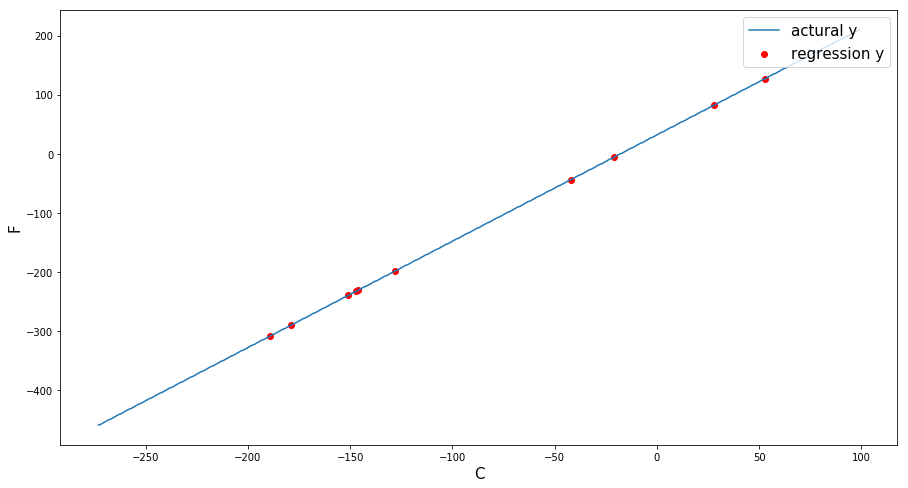

In [15]:
plt.figure(figsize=(15,8))
plt.plot(real_X,real_fx, label='actural y') # the actural curve 
#plt.plot(X,fx, label='predict y') # the prediction curve
plt.scatter(test_X[:,0] ,pred_y,  label='regression y',c='r')
plt.legend(loc='upper right',prop={'size': 15})
plt.ylabel('F',fontsize=15)
plt.xlabel('C',fontsize=15)
plt.show()
plt.close()

## Non-linear regression

## Import packages

Import packages to make most of the third-party functions work.


In [16]:
import csv
import numpy as np

## Read data from .csv

The simple way to read data from our .csv file.


In [17]:
price_list = list()

# read s&p500 data
with open('data/SP500.csv','r') as f:
    for row in csv.reader(f,delimiter=','):
            price_list.append(row)

  ## Save as numpy array
  
  It's such a better data type to store data.<br>

In [18]:
'''  
Because the index of 0 is the schema of our dataset, we needn't it.

'''

data = np.array(price_list)[1:,1:]
date =  np.array(price_list)[1:,0]
data = np.float32(data)

## Supposed to split them into two parts, training data and testing data.

We predict next price(close) from the current data.

In [19]:
split_rate = 0.2 # HOW TO DIVIDE TRAINING DATA AND TESTING DATA


# training data
train_X = data[:-round(len(data)*split_rate)-1]
train_y = data[1:-round(len(data)*split_rate), 3].reshape(-1,1) # index of close is 3th.

# testing data
test_X = data[-round(len(data)*split_rate)-1:-1]
test_y = data[-round(len(data)*split_rate):, 3].reshape(-1,1)

date = date[-round(len(data)*split_rate):]

## Import scikit learn library
<hr>
Scikit learn also named sklearn.<br>
Which is one of the most famous modules in machine learning,and -
<br>
Machine learning models in packages of Sklearn 
<br>
* **Classification**
<br><br>
* **Regression**
<br><br>
* **Clustering**
<br><br>
* **Dimensionality reduction**
<br><br>
* **Model Selection**
<br><br>
* **Preprocessing**
<br><br><br><br>
reference by https://morvanzhou.github.io/tutorials/machine-learning/sklearn/1-1-why/

In [20]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

## LinearRegression
<hr>
we used the sklearn package and called this function which is the model of Ordinary least squares Linear Regression.And the brief discription is above on the concept of linear regression.

In [21]:
# Create linear regression object
regr = linear_model.LinearRegression()

## Training

In [22]:
# Train the model using the training sets
regr.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Prediction

In [23]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(test_X)

In [24]:
# The coefficients
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [[0.19902088 0.19935505 0.19912232 0.1989948  0.1989948  0.        ]]


## Loss functon (MSE)
<hr>
In statistics, the mean squared error (MSE) of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors—that is, the average squared difference between the estimated values and what is estimated.<br> MSE is a risk function, corresponding to the expected value of the squared error loss.<br> The fact that MSE is almost always strictly positive is because of randomness or because the estimator does not account for information that could produce a more accurate estimate.
<br>
The MSE is a measure of the quality of an estimator—it is always non-negative, and values closer to zero are better.
<br><br>
<img src="https://i.imgur.com/qYaL1sl.png" alt="drawing" style="width:200px;"/>


In [25]:
# def mean_squared_error(predictions, targets):
#     return np.sqrt(((predictions - targets) ** 2).mean())

In [26]:
# The mean squared error from scikit learn package
print("Mean squared error: %.2f" % mean_squared_error(test_y, diabetes_y_pred))

Mean squared error: 450.07


## Score
<hr>
Returns the coefficient of determination R<sup>2</sup> of the prediction.
<br><br>
The coefficient R<sup>2</sup> is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred)<sup>2</sup>).sum() and v is the total sum of squares ((y_true - y_true.mean())<sup>2</sup>).sum(). <br><br>The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

In [27]:

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(test_y, diabetes_y_pred))

Variance score: 0.97


## Normalize 
<hr>


In [28]:
from sklearn import preprocessing 

## Visualization

We can identify the result of our prediction !<br>

In [29]:
from matplotlib import pyplot as plt

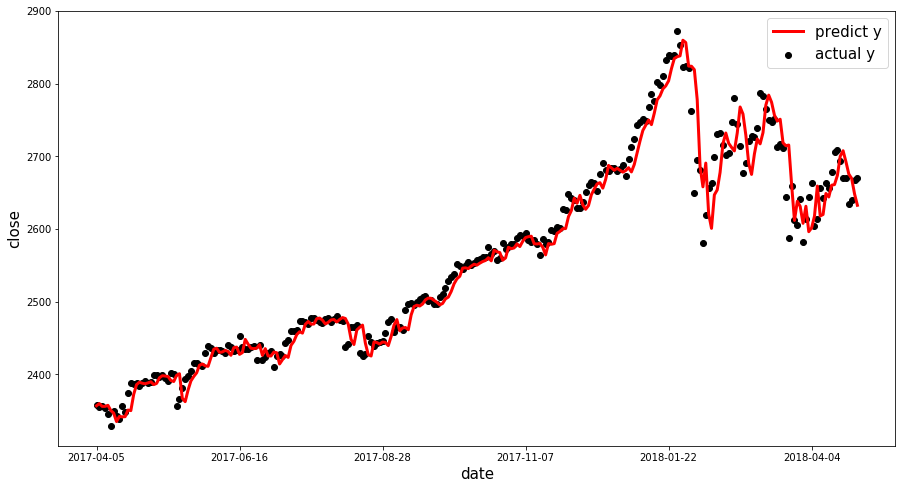

In [30]:
# Plot outputs
plt.figure(figsize=(15,8))
plt.scatter(range(len(test_y)-1), test_y[1:],  color='black',label='actual y')
plt.plot(range(len(test_y)-1), diabetes_y_pred[:-1], color='red',label='predict y', linewidth=3)
plt.legend(loc='upper right',prop={'size': 15})
plt.ylabel('close',fontsize=15)
plt.xlabel('date',fontsize=15)
plt.xticks(range(len(test_y)-1)[::50], date[::50])
plt.show()
plt.close()

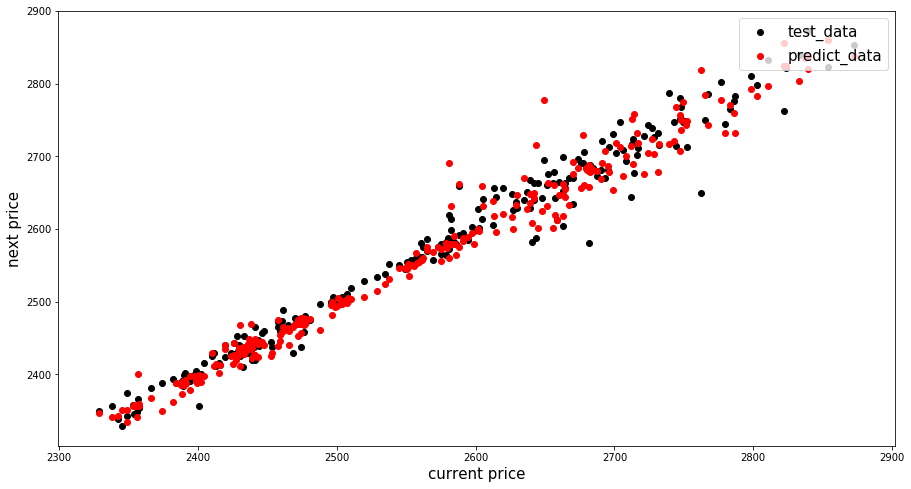

In [31]:
# Plot outputs
plt.figure(figsize=(15,8))
plt.scatter(test_y[:-1], test_y[1:],  color='black',label='test_data')
plt.scatter(test_y[:-1], diabetes_y_pred[:-1], color='red',label='predict_data')
plt.legend(loc='upper right',prop={'size': 15})
plt.ylabel('next price',fontsize=15)
plt.xlabel('current price',fontsize=15)
plt.show()
plt.close()

## References
<hr>

1. https://sebastianraschka.com/faq/docs/closed-form-vs-gd.html?utm_source=top.caibaojian.com/52598
2. https://en.wikipedia.org/wiki/Linear_regression
3. https://en.wikipedia.org/wiki/Linear_least_squares_(mathematics) 
4. https://morvanzhou.github.io/tutorials/machine-learning/sklearn/1-1-why/

## But here is unsuitable ...

<hr>
such as Iris data set, which being using to predict the label [0,1,2].
<br>
But, unfortunately, the result from regression model performs bad.
<br>
So we need other approach to achieve that.

In [32]:
from sklearn import datasets
''' import iris datasets '''

iris = datasets.load_iris()

X = iris.data  
y = iris.target

In [33]:
X_b = np.concatenate((X, np.ones(len(X)).reshape(-1,1)), axis=1)
X_b # ax + bias = y

array([[5.1, 3.5, 1.4, 0.2, 1. ],
       [4.9, 3. , 1.4, 0.2, 1. ],
       [4.7, 3.2, 1.3, 0.2, 1. ],
       [4.6, 3.1, 1.5, 0.2, 1. ],
       [5. , 3.6, 1.4, 0.2, 1. ],
       [5.4, 3.9, 1.7, 0.4, 1. ],
       [4.6, 3.4, 1.4, 0.3, 1. ],
       [5. , 3.4, 1.5, 0.2, 1. ],
       [4.4, 2.9, 1.4, 0.2, 1. ],
       [4.9, 3.1, 1.5, 0.1, 1. ],
       [5.4, 3.7, 1.5, 0.2, 1. ],
       [4.8, 3.4, 1.6, 0.2, 1. ],
       [4.8, 3. , 1.4, 0.1, 1. ],
       [4.3, 3. , 1.1, 0.1, 1. ],
       [5.8, 4. , 1.2, 0.2, 1. ],
       [5.7, 4.4, 1.5, 0.4, 1. ],
       [5.4, 3.9, 1.3, 0.4, 1. ],
       [5.1, 3.5, 1.4, 0.3, 1. ],
       [5.7, 3.8, 1.7, 0.3, 1. ],
       [5.1, 3.8, 1.5, 0.3, 1. ],
       [5.4, 3.4, 1.7, 0.2, 1. ],
       [5.1, 3.7, 1.5, 0.4, 1. ],
       [4.6, 3.6, 1. , 0.2, 1. ],
       [5.1, 3.3, 1.7, 0.5, 1. ],
       [4.8, 3.4, 1.9, 0.2, 1. ],
       [5. , 3. , 1.6, 0.2, 1. ],
       [5. , 3.4, 1.6, 0.4, 1. ],
       [5.2, 3.5, 1.5, 0.2, 1. ],
       [5.2, 3.4, 1.4, 0.2, 1. ],
       [4.7, 3

In [34]:
weight = OLSR(X_b,y) # get weight
f = np.sum(weight*X_b, axis=1) # weight * X
SSE = sum_of_square_error(f, y) # get current error

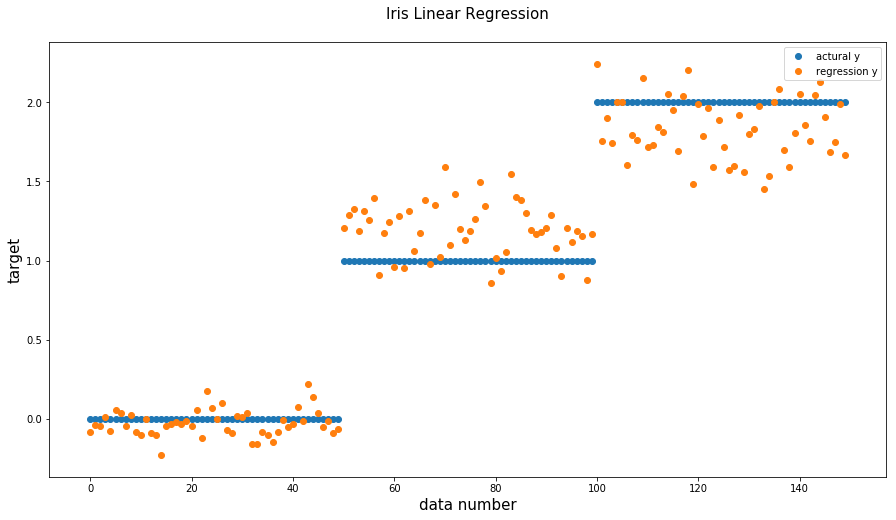

In [35]:
plt.figure(figsize=(15,8))
plt.title('Iris Linear Regression\n',fontsize=15)
plt.scatter(range(len(y)),y,  label='actural y')
plt.scatter(range(len(f)),f,  label='regression y')
plt.legend(loc='upper right')
plt.ylabel('target',fontsize=15)
plt.xlabel('data number',fontsize=15)
plt.show()

<hr>
###  We don't know how to define our result of prediction! 
###  So the logistic regression is necessary !